# 1. Library prep

In [19]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import nltk


# 2. Data loading and initial inspection

From the README:

- Column 1: the ID of the statement ([ID].json).
- Column 2: the label.
- Column 3: the statement.
- Column 4: the subject(s).
- Column 5: the speaker.
- Column 6: the speaker's job title.
- Column 7: the state info.
- Column 8: the party affiliation.
- Column 9-13: the total credit history count, including the current statement.
  - 9: barely true counts.
  - 10: false counts.
  - 11: half true counts.
  - 12: mostly true counts.
  - 13: pants on fire counts.
- Column 14: the context (venue / location of the speech or statement).

In [24]:
# read the LIAR dataset

liar_column_headers = ['id', 'label', 'statement', 'subjects', 'speaker', 'speaker_job', 'speaker_us_state', 'speaker_affiliation', 
                        'speaker_bt', 'speaker_f', 'speaker_ht', 'speaker_mt', 'speaker_pof', 'context']
liar_train = pd.read_csv("./data/liar_dataset/train.tsv", sep='\t', names=liar_column_headers)

liar_train

,id,label,statement,subjects,speaker,speaker_job,speaker_us_state,speaker_affiliation,speaker_bt,speaker_f,speaker_ht,speaker_mt,speaker_pof,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [7]:
liar_train.iloc[0]['statement']

'Says the Annies List political group supports third-trimester abortions on demand.'

Plot the truth values of the dataset

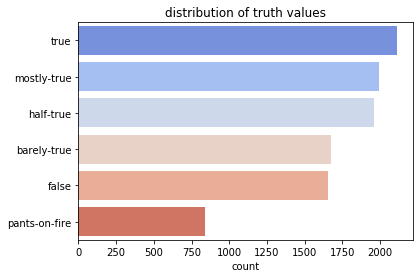

In [55]:
liar_label_order = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-on-fire']

sns.barplot(y=liar_label_order, x=liar_train['label'].value_counts(), palette='coolwarm').set(title='distribution of truth values', xlabel='count');

In [50]:
liar_train['speaker_affiliation'].value_counts()

Index(['republican', 'democrat', 'none', 'organization', 'independent',
       'newsmaker', 'libertarian', 'activist', 'journalist', 'columnist',
       'talk-show-host', 'state-official', 'labor-leader', 'tea-party-member',
       'business-leader', 'green', 'education-official',
       'liberal-party-canada', 'constitution-party', 'government-body',
       'ocean-state-tea-party-action', 'Moderate', 'democratic-farmer-labor'],
      dtype='object')

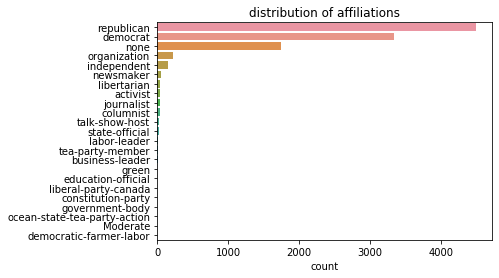

In [57]:
sns.barplot(y=liar_train['speaker_affiliation'].value_counts().index, x=liar_train['speaker_affiliation'].value_counts()).set(title='distribution of affiliations', xlabel='count');